#**Final Project 2**
##Group 1


*   Reynaldi Ananda Putra / PYTN-KS20-014
*   Reva Fahrian Natamenggala / PYTN-KS20-017
*   Desmonda Zefanya Namora Putri Manurung / PYTN-KS20-024

# Introduction

Prakiraan hujan sangat penting karena hujan lebat dan tidak teratur dapat menimbulkan banyak dampak seperti rusaknya tanaman dan lahan pertanian atau kerusakan harta benda. Model peramalan yang lebih baik sangat penting untuk peringatan dini yang dapat meminimalkan risiko terhadap kehidupan dan harta benda serta mengelola pertanian dengan cara yang lebih baik. Namun, prediksi hujan merupakan tugas yang menantang dan hasilnya harus akurat. Dengan memiliki data historis, pembelajaran mesin dapat digunakan untuk memprediksi hujan secara akurat untuk musim-musim mendatang. Teknik yang berbeda menghasilkan akurasi yang berbeda, jadi penting untuk memilih algoritma yang tepat seperti regresi logistik dan SVM.

Note:


*   Dataset diambil dari [Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package) dengan 145.460 baris dan 23 kolom

# Import Libraries

In [1]:
# Data Wrangling
import numpy as np
import sympy as sp
import pandas as pd
!pip install dython
from dython.nominal import associations
import joblib

# Data Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

# Modeling
!pip install scikit-learn --upgrade
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from pickle import dump,load
from sklearn.preprocessing import TargetEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Settings
pd.set_option("display.max.columns",None)
%matplotlib inline
mpl.style.use(["ggplot"])

# Data Loading

Impor *weatherAUS.csv* sebagai *df*.

In [2]:
df = pd.read_csv("weatherAUS.csv",parse_dates=["Date"])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Periksa bentuk dataset yang memiliki 145.460 baris dan 23 kolom.


In [3]:
df.shape

(145460, 23)

# Data Cleaning

Menampilkan jumlan *NaN* Values

In [4]:
df.isnull().mean().sort_values(ascending=False)

Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64

Menghapus baris yang memiliki nilai kosong pada kolom RainTomorrow, karena dia adalah target  dan terlihat juga bahwa fitur *Sunshine*, *Evaporation*, *Cloud3pm*, and *Cloud9am*memiliki banyak nilai *NaN*. Menggantinya mungkin meningkatkan ketidakakuratan kumpulan data. jadi, kita bisa drop saja.

In [5]:
df.dropna(subset=["RainTomorrow"],inplace=True)
df.drop(columns = ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm'],inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Tentukan fitur mana yang bersifat kategorikal dan numerik.


In [6]:
cat_cols = df.columns[df.dtypes == object]
num_cols = df.columns[df.dtypes != object]

print("Categorical Columns: ",cat_cols)
print("Numerical Columns: ",num_cols)

Categorical Columns:  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')
Numerical Columns:  Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')


Deteksi dan visualisasikan outlier untuk setiap fitur numerik menggunakan plot kotak. 

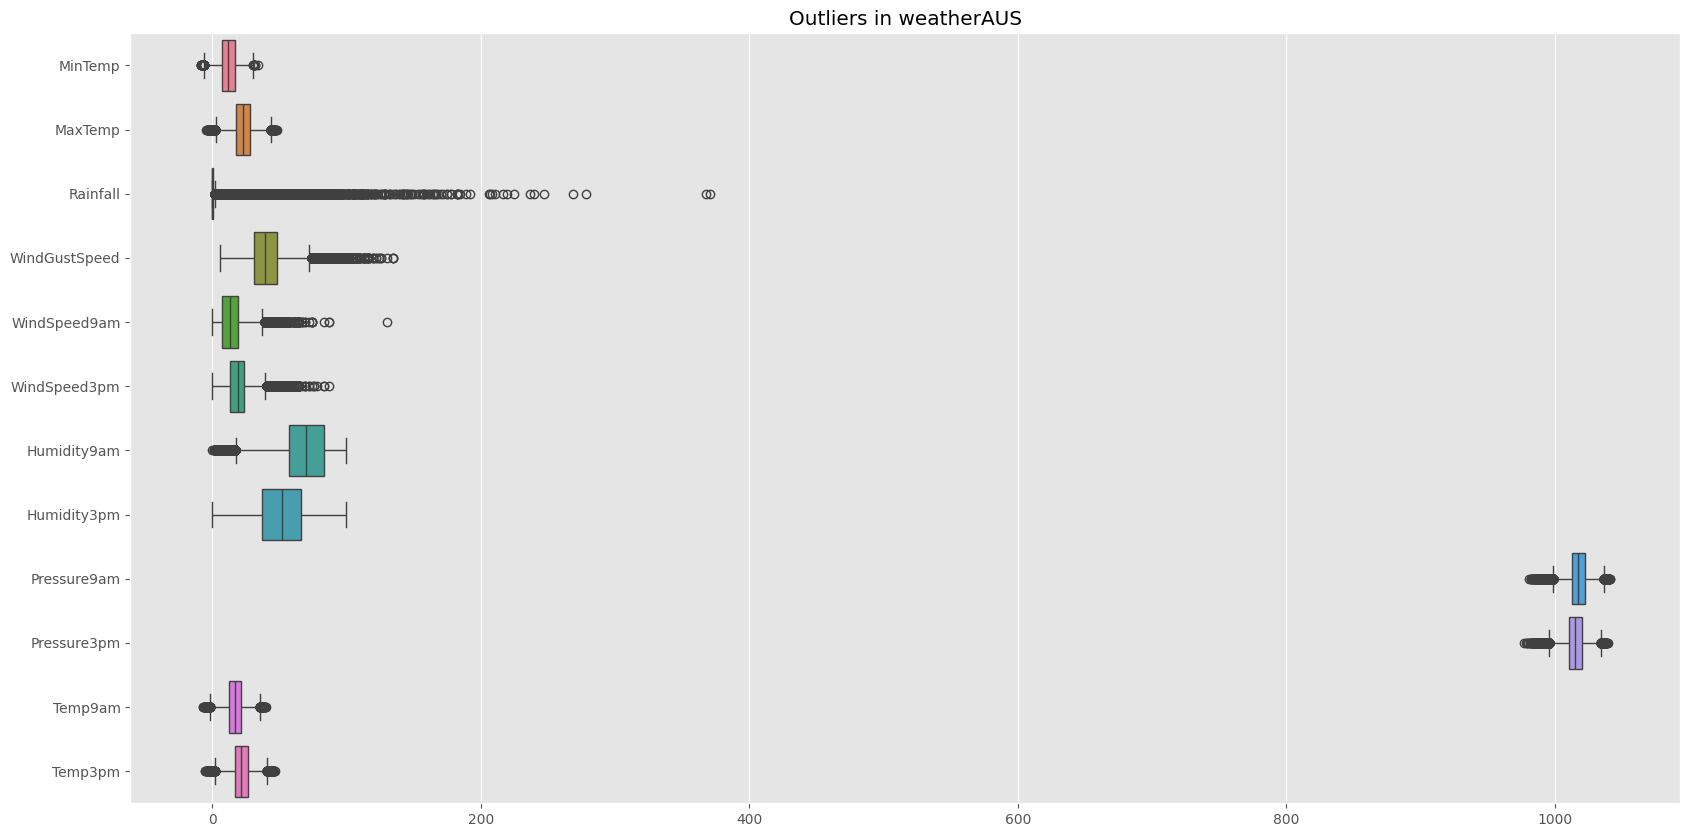

In [7]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, orient="h")
plt.title("Outliers in weatherAUS")
plt.show()

Seperti yang bisa dilihat, ada banyak outlier. Hapus outlier dengan hanya mengambil nilai yang berada dalam batas atas dan bawah.

In [8]:
for i in num_cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df = df[(df[i] > lower) & (df[i] < upper)]

Deteksi dan visualisasikan outlier untuk kedua kalinya. 

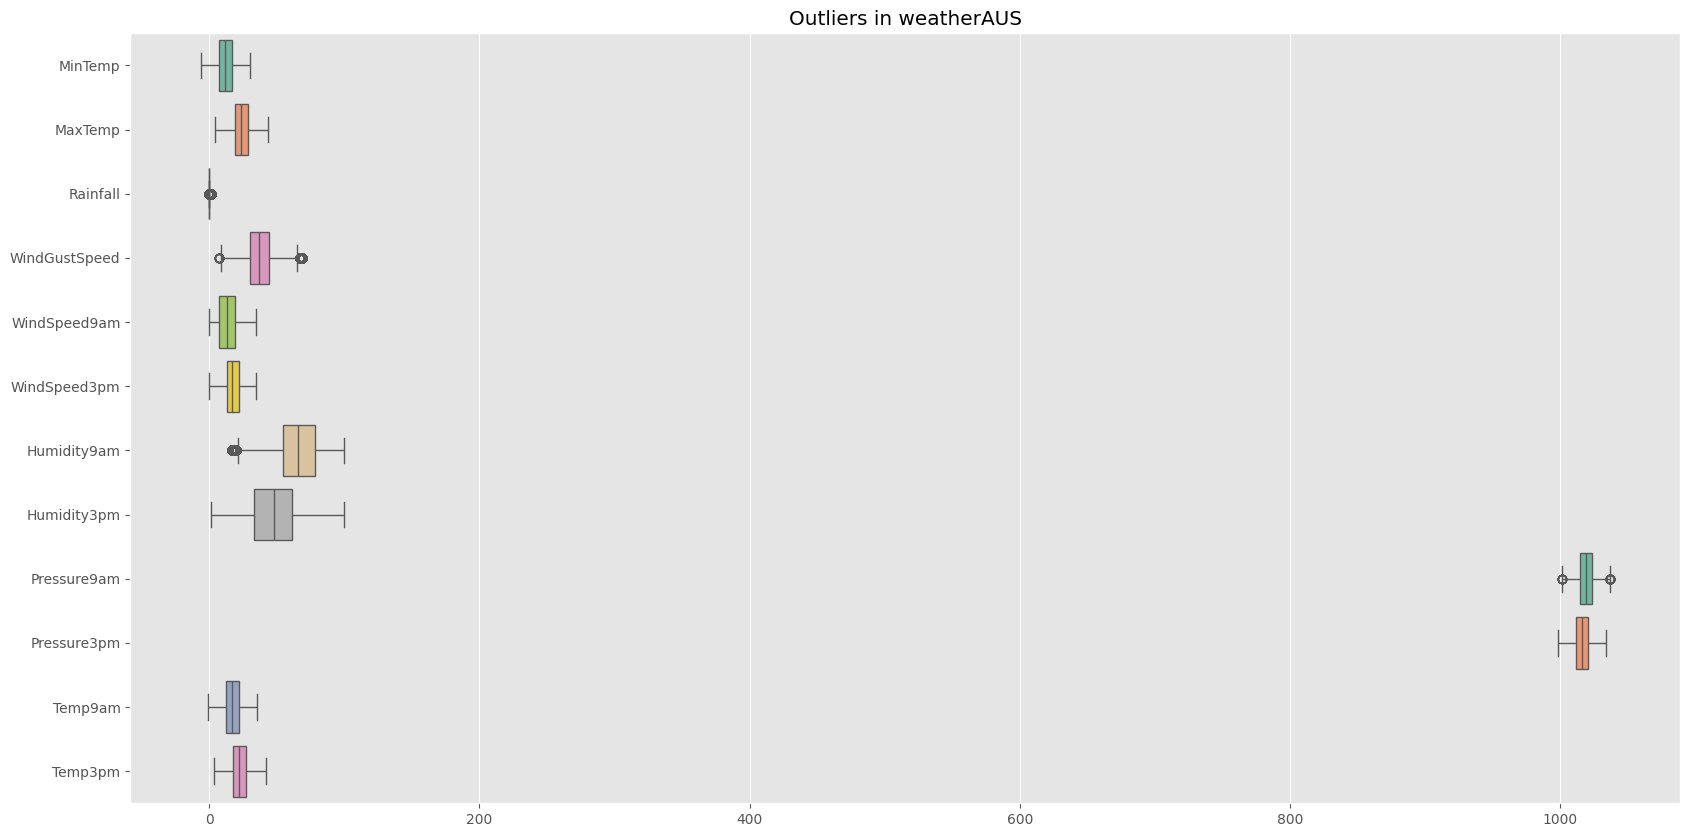

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Outliers in weatherAUS")
plt.show()

Seperti yang dapat dilihat, meskipun fitur *Rainfall* masih memiliki beberapa outlier, secara keseluruhan fitur ini jauh lebih baik daripada sebelumnya. Selain itu, menghapus outlier di fitur *Rainfall* akan mengurangi ukuran kumpulan data secara signifikan, jadi kita akan membiarkannya seperti sekarang.

Temukan korelasi antara fitur numerik dan kategorikal dengan bantuan pustaka *dython*.

<Axes: >

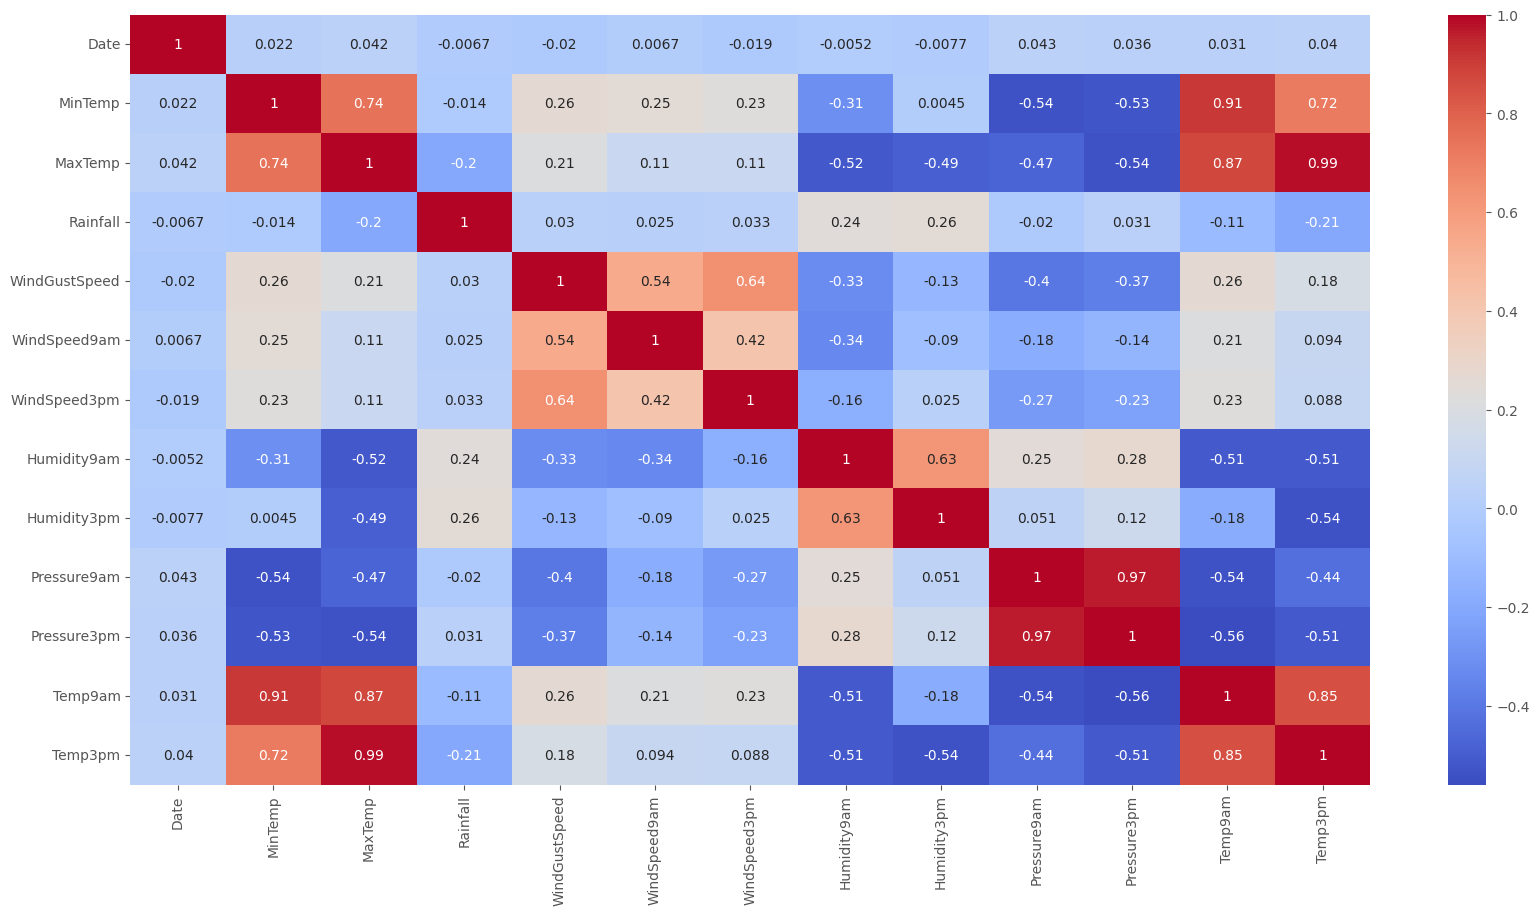

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")

Karena terdapat fitur yang memiliki korelasi tinggi, maka akan dilakukan penghapusan fitur yang memiliki korelasi tinggi

In [11]:
def drop_corr(data,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

high_corr_col = drop_corr(df[num_cols],0.95)
len(high_corr_col)

2

In [12]:
high_corr_col

{'Pressure3pm', 'Temp3pm'}

# Data Exploration

Lihat seberapa sering hujan dengan memvisualisasikan *RainToday* dan *RainTomorrow*. 

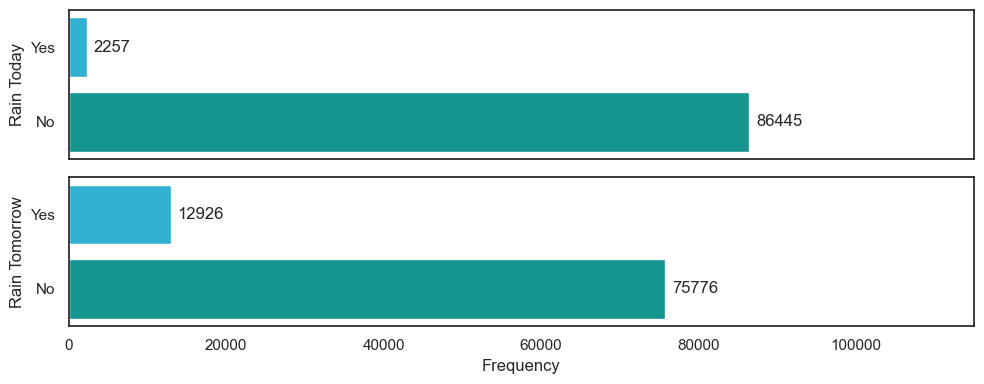

In [42]:
nrows,ncols = 2,1
fig,ax = plt.subplots(figsize=(10,4),nrows=nrows,ncols=ncols,sharex=True)
sns.set_theme(style="white")
sns.color_palette("bright")
for i,j,k in zip(range(nrows),["RainToday","RainTomorrow"],["Rain Today","Rain Tomorrow"]):
    countplot = sns.countplot(data=df,y=j,palette=["#00AAA2","#17c0eb"],hue = j,order=["Yes","No"],ax=ax[i])
    for l in countplot.containers:
        countplot.bar_label(l,padding=5)
    ax[i].set_xlabel("")
    ax[i].set_xlim(0,115000)
    ax[i].set_ylabel(k)

ax[1].set_xlabel("Frequency")
plt.tight_layout()
plt.show()

Seperti yang terlihat, kumpulan data tidak terdistribusi secara merata dalam 2 kelas ini.

Hitung persentase terjadinya hujan pada hari berikutnya berdasarkan apakah hari ini turun hujan atau tidak. 

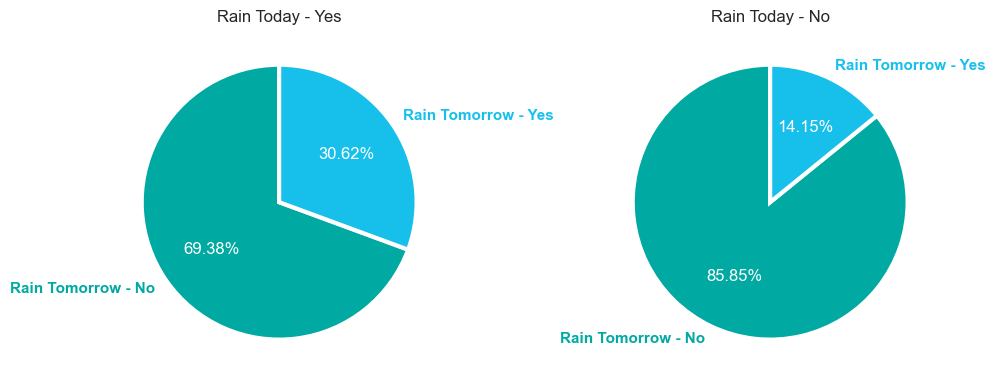

In [41]:
nrows,ncols = 1,2
fig,ax = plt.subplots(figsize=(10,4),nrows=nrows,ncols=ncols)

for i,j in zip(range(ncols),["Yes","No"]):
    patches,texts,pcts = ax[i].pie(
        np.ravel(df.groupby(["RainToday","RainTomorrow"]).count()[["Location"]].loc[j].values),
        labels=["Rain Tomorrow - No","Rain Tomorrow - Yes"],
        startangle=90,
        colors=["#00AAA2","#17c0eb"],
        autopct="%.2f%%",
        wedgeprops={"linewidth":3.0,"edgecolor":"white"},
    )
    for k,patch in enumerate(patches):
        texts[k].set_color(patch.get_facecolor())

    plt.setp(pcts,color="white")
    plt.setp(texts,fontweight=600)

    ax[i].set_title(f"Rain Today - {j}")

plt.tight_layout()
plt.show()

Persentasi besok hujan hari ini adalah hujan, lebih besar dibandingkan jika hari ini tidak hujan

Hitung curah hujan rata-rata setiap lokasi.

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_18384\924168779.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_rainfall, x="Location", y="Rainfall", palette="Blues_r")


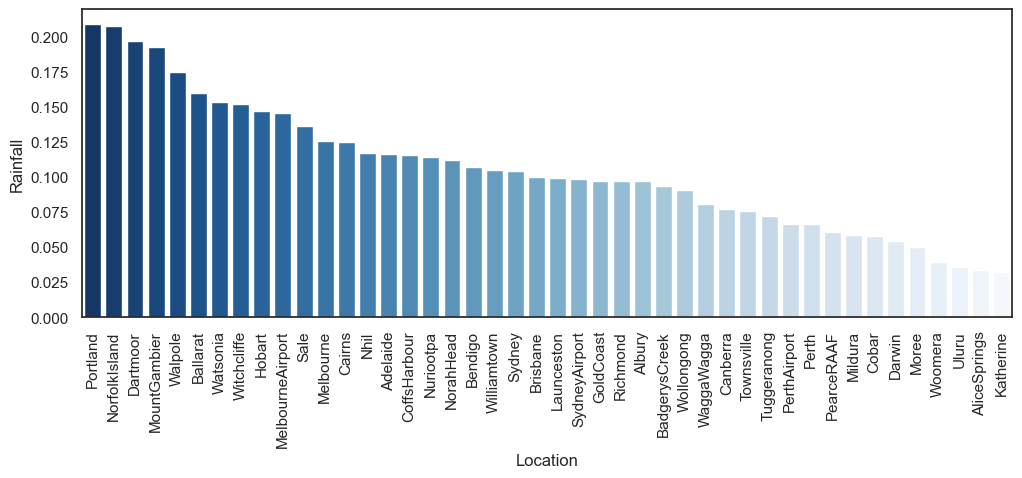

In [15]:
plt.figure(figsize=(12, 4))
avg_rainfall = df.groupby("Location").Rainfall.mean().sort_values(ascending=False).reset_index()
sns.barplot(data=avg_rainfall, x="Location", y="Rainfall", palette="Blues_r")
plt.xticks(rotation=90)
plt.xlabel("Location")
plt.legend([], [], frameon=False)
plt.show()

Terlihat, Portland (berwarna biru gelap) memiliki curah hujan tertinggi yaitu 0,2+.

## Feature Engineering

In [16]:
def create_new_feat(data):
    tmp = data.copy()
    tmp["Year"] = tmp["Date"].dt.year
    tmp["Month"] = tmp["Date"].dt.month
    tmp["Day"] = tmp["Date"].dt.day

    return tmp

df = create_new_feat(df)

# Data Preprocessing

Bagi kerangka data menjadi set training dan testing dengan rasio 70:30.

In [17]:
X = df.drop(columns=["RainTomorrow","Date"])
y = df["RainTomorrow"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
print("X_train shape: ",X_train.shape)
print("X_test shape: ",X_test.shape)
print("y_train shape: ",y_train.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (62091, 20)
X_test shape:  (26611, 20)
y_train shape:  (62091,)
y_test shape:  (26611,)


Menggunakan *Target Encder* untuk mengubah fitur kategorikal menjadi fitur numerik, dengan metode ini kami dapat menangani kardinalitas tinggi dari fitur kategorikal.
Ganti nilai *NaN* dalam fitur kategorikal dan numerik dengan median dan mode masing-masing.

In [18]:


cat_cols = X_train.columns[X_train.dtypes == object]
num_cols = X_train.columns[X_train.dtypes != object]

num_pipe = Pipeline([
    ('impute',SimpleImputer(strategy='median')),
    ("scaler",StandardScaler())
])

cat_pipe = Pipeline([
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode',TargetEncoder(random_state=42))
])

preprocessor = ColumnTransformer([
    ('num',num_pipe,num_cols),
    ('cat',cat_pipe,cat_cols)
],verbose_feature_names_out=False).set_output(transform='pandas')

In [19]:
preprocessor.fit_transform(X_train,y_train)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
42050,1.676712,0.939146,-0.383171,0.814392,-0.273768,0.301558,0.610548,0.966478,-1.116763,-1.303830,1.213140,0.958432,1.280487,-1.263841,-0.077268,0.170583,0.089281,0.167547,0.111603,0.141759
45869,-2.314384,-2.139804,-0.383171,0.534524,-0.919712,0.841779,0.554875,1.174882,0.566585,0.455372,-1.816960,-2.204071,-1.885976,0.483508,-0.760320,0.120774,0.213988,0.243909,0.196378,0.141396
46910,-2.096970,-1.754935,-0.383171,-1.051389,-1.436467,-0.913939,1.000254,0.758073,2.249932,1.965484,-1.957532,-1.763145,-0.698552,0.192283,0.036574,0.132655,0.088578,0.245389,0.147727,0.141535
37881,-1.460258,-0.333881,-0.383171,-1.051389,-0.273768,-0.103607,0.554875,-0.804959,1.096527,1.093667,-1.004769,-0.349141,-0.302745,1.065958,-0.191110,0.131208,0.168573,0.110904,0.150683,0.141759
97104,-0.559544,-1.636514,3.996908,2.960039,0.501364,0.841779,0.666220,0.966478,-0.898551,-0.774512,-1.098483,-1.535080,-1.094360,0.483508,0.947311,0.152001,0.133116,0.240658,0.121190,0.304857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96424,0.154816,-0.748355,-0.383171,0.161368,0.501364,0.166503,-0.669916,-0.388151,0.317200,0.797872,-0.411244,-0.622819,-1.885976,1.065958,-0.304952,0.152001,0.138094,0.146894,0.102882,0.141559
64880,-0.295542,-0.215460,-0.383171,-0.398366,-0.015390,-0.103607,0.833237,0.705972,0.893902,0.844576,-0.489339,-0.303528,-1.094360,1.357183,0.605784,0.155728,0.130094,0.100606,0.111522,0.141396
142270,1.863067,1.546054,-0.383171,0.347946,-0.790523,0.571669,0.276514,-0.804959,-0.851791,-0.992467,1.791045,1.733853,1.676295,-0.390167,0.833469,0.127339,0.088512,0.090978,0.109292,0.141543
66266,0.744939,-0.600329,-0.383171,-0.211788,0.242987,1.111889,1.000254,1.539590,-1.568772,-1.350534,0.088566,-0.485980,0.488871,1.648408,-1.215689,0.160850,0.129658,0.131408,0.125043,0.141535


# Models Definition & Training

Buat model regresi logistik dan train dengan set data training. Dalam hal ini, parameter *class_weight = balanced* digunakan untuk mengatasi ketidakseimbangan kelas dengan memberikan bobot yang berbeda baik pada kelas mayoritas maupun minoritas.

In [20]:
log_model = Pipeline([
    ('preprocessor',preprocessor),
    ('logreg',LogisticRegression(class_weight="balanced",random_state=42))
])

log_model.fit(X_train,y_train)

c:\Users\VICTUS\.conda\envs\data-slayer\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   TargetEncoder(random_state=42))]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logreg',
                 LogisticRegression(class_weight='balanced', random_state=42))])

Buat model SVM dan latih dengan dataset training. Parameter *class_weight = balanced* juga digunakan.

In [22]:
svm_model = Pipeline([
    ('preprocessor',preprocessor),
    ('svm',SVC(class_weight="balanced",random_state=42))
])

svm_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   TargetEncoder(random_state=42))]),
                                                  Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svm', SVC(class_weight='balanced', random_state=42))])

# Models Evaluation

Evaluasi model regresi logistik.

In [23]:
y_pred_log = log_model.predict(X_test)
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

          No       0.95      0.79      0.86     22733
         Yes       0.37      0.74      0.49      3878

    accuracy                           0.78     26611
   macro avg       0.66      0.76      0.68     26611
weighted avg       0.86      0.78      0.81     26611



berdasarkan laporan klasifikasi, model kurang baik dalam memprediksi kelas minoritas (Rain Tomorrow - Yes). Nilai recall kelas minoritas sebesar 0,74 yang tergolong kurang baik. Model tersebut baik dalam memprediksi kelas mayoritas (Rain Tomorrow - No) dengan skor recall 0,79. Makro skor F1 untuk model ini adalah 0,68 dengan akurasi 0,78

Evaluasi model SVM

In [24]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.95      0.79      0.86     22733
         Yes       0.38      0.77      0.51      3878

    accuracy                           0.79     26611
   macro avg       0.67      0.78      0.69     26611
weighted avg       0.87      0.79      0.81     26611



jika dibandingkan dengan LogisticRegression Model, model SVM lebih baik di setiap metriknya.

Setelah setiap model dievaluasi, saatnya membandingkan hasilnya. Periksa persentase prediksi benar dan salah dari kedua model.

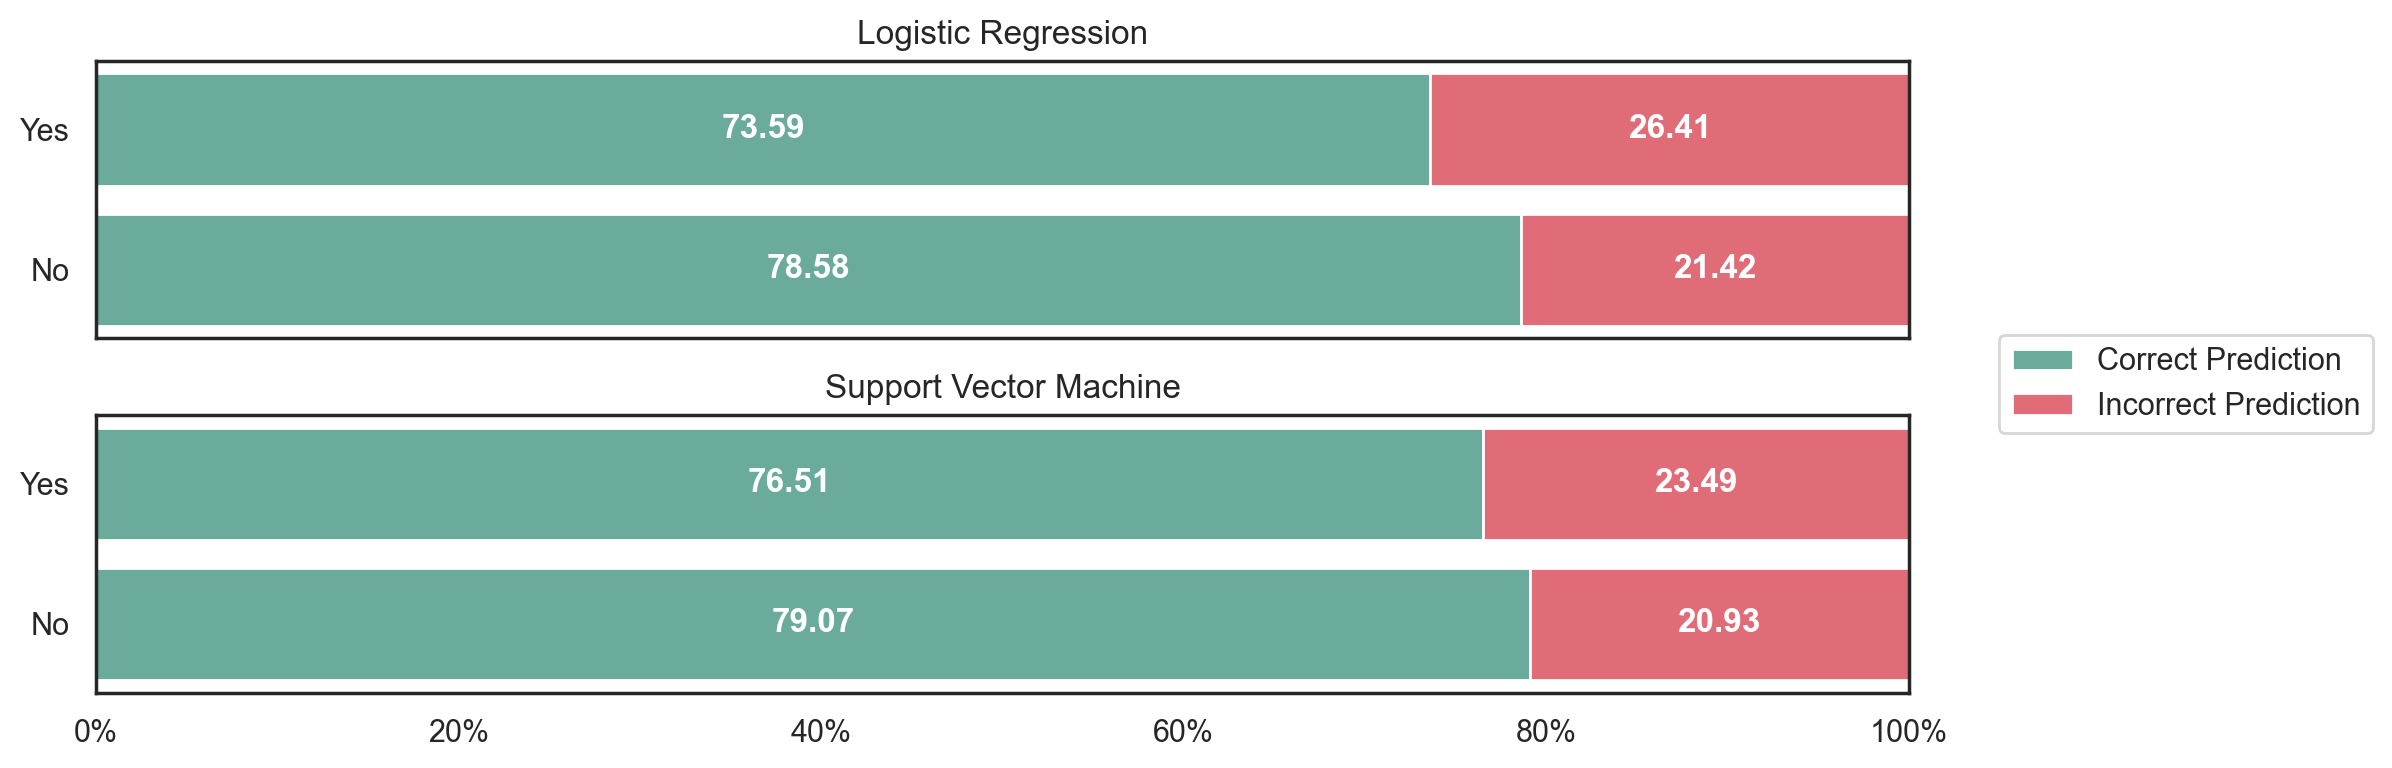

In [25]:
nrows,ncols = 2,1
fig,ax = plt.subplots(figsize=(10,4),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i,j,k in zip(range(nrows),[y_pred_log,y_pred],["Logistic Regression","Support Vector Machine"]):
    true_yes = confusion_matrix(y_test,j)[1,1]
    false_yes = confusion_matrix(y_test,j)[1,0]
    true_no = confusion_matrix(y_test,j)[0,0]
    false_no = confusion_matrix(y_test,j)[0,1]

    ax[i].barh("No",true_no / (true_no + false_no) * 100,color="#6AAB9C",label="Correct Prediction")
    ax[i].barh("No",false_no / (true_no + false_no) * 100,left=true_no / (true_no + false_no) * 100,color="#E06C78",label="Incorrect Prediction")
    ax[i].barh("Yes",true_yes / (true_yes + false_yes) * 100,color="#6AAB9C")
    ax[i].barh("Yes",false_yes / (true_yes + false_yes) * 100,left=true_yes / (true_yes + false_yes) * 100,color="#E06C78")

    ax[i].set_title(k)
    ax[i].set_xlim(xmax=100)

    for container in ax[i].containers:
        ax[i].bar_label(container,fmt="%.2f",label_type="center",color="white",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))
handles,labels = ax[i].get_legend_handles_labels()
fig.legend(handles,labels,bbox_to_anchor=(1,0.5),loc="center left")

plt.tight_layout()
plt.show()

Bandingkan skor kinerja kedua model. Untuk *precision_score()*, *recall_score()*, dan *f1_score()*, parameter *average = weighted* digunakan untuk memperhitungkan ketidakseimbangan kelas.

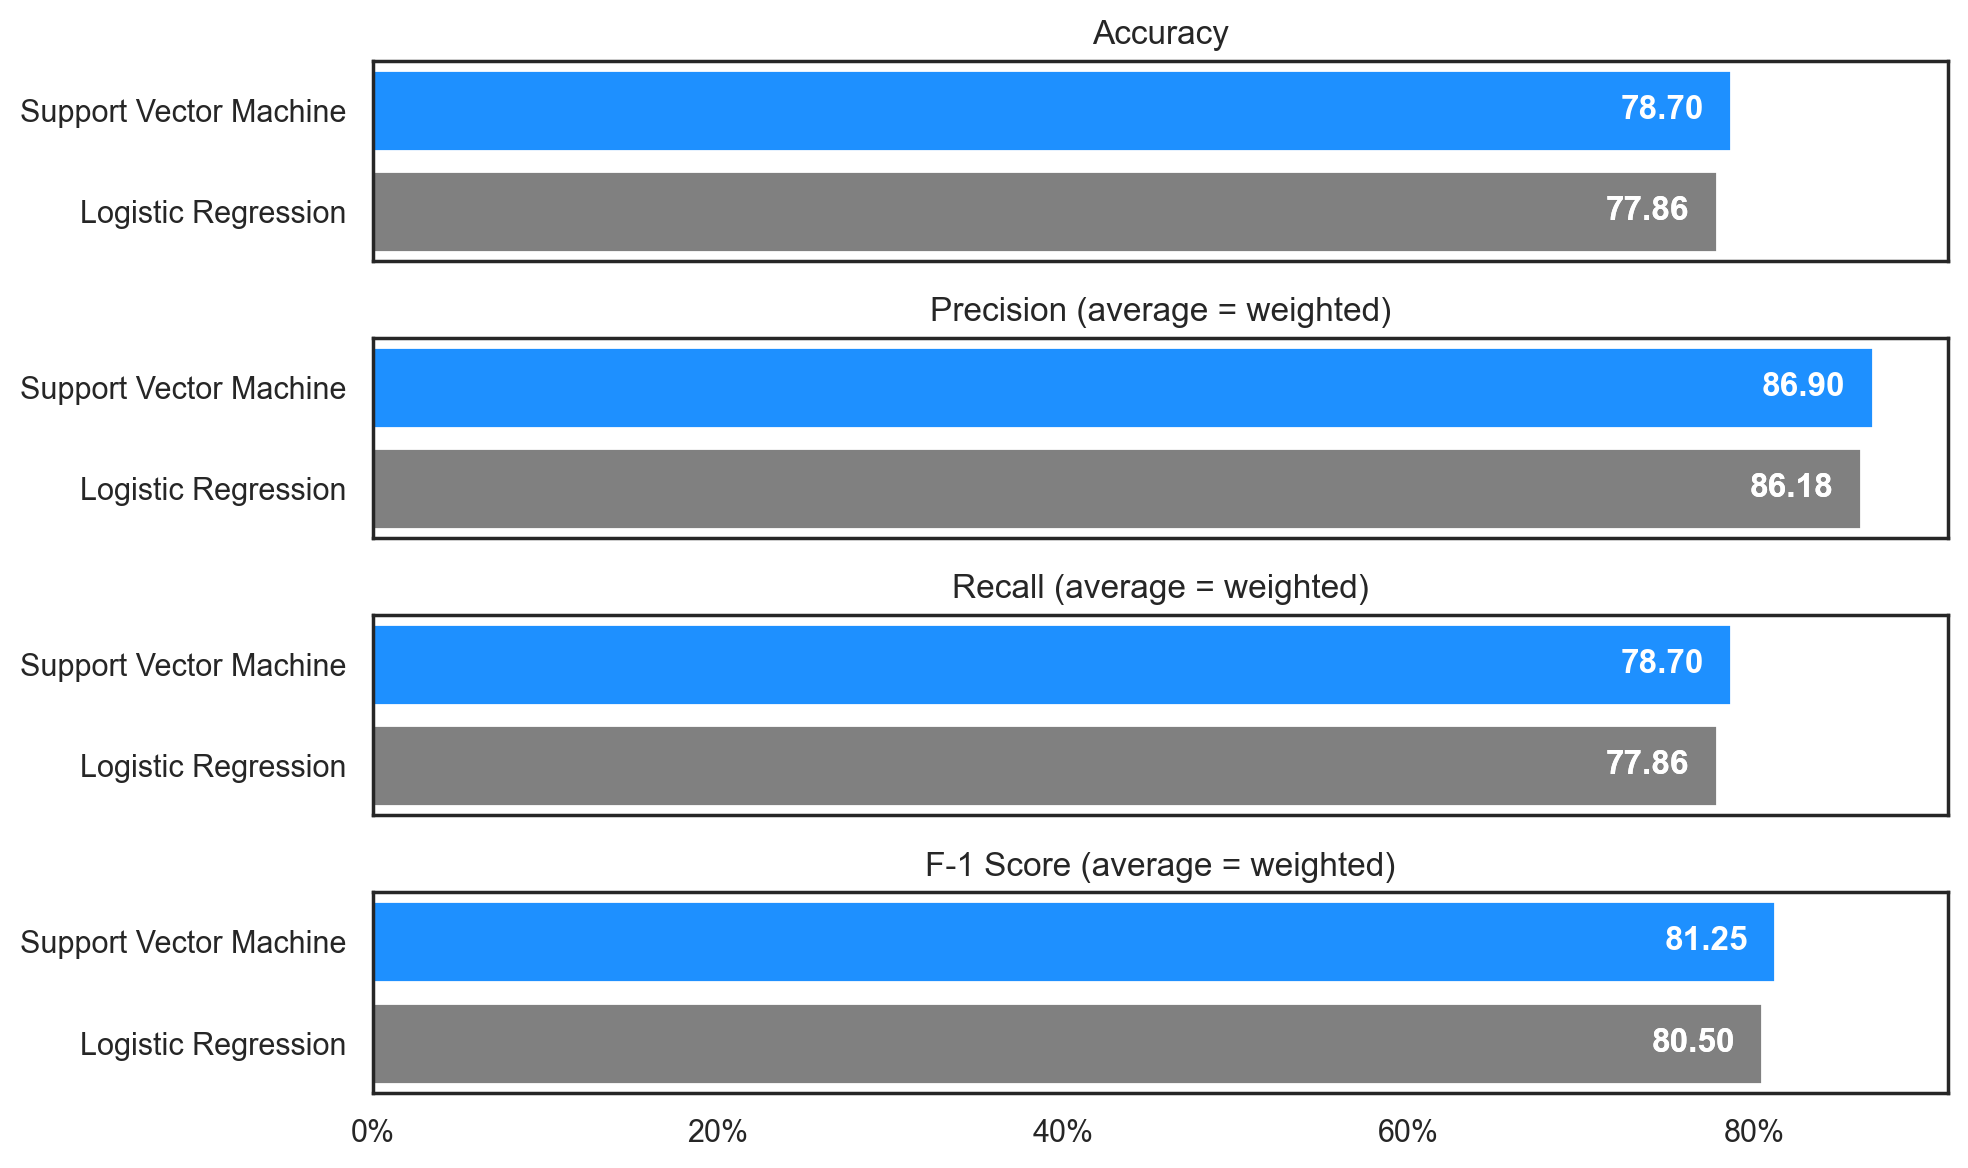

In [26]:
nrows,ncols = 4,1
fig,ax = plt.subplots(figsize=(10,6),dpi=200,nrows=nrows,ncols=ncols,sharex=True)

for i in range(nrows):
    for j,k,l in zip(
        [y_pred_log,y_pred],
        ["Logistic Regression","Support Vector Machine"],
        ["grey","dodgerblue"]
    ):
        if i == 0:
            metric = accuracy_score(y_test,j) * 100
            title = "Accuracy"
        elif i == 1:
            metric = precision_score(y_test,j,average="weighted") * 100
            title = "Precision (average = weighted)"
        elif i == 2:
            metric = recall_score(y_test,j,average="weighted") * 100
            title = "Recall (average = weighted)"
        else:
            metric = f1_score(y_test,j,average="weighted") * 100
            title = "F-1 Score (average = weighted)"

        ax[i].barh(k,metric,color=l)
        ax[i].set_title(title)

        for container in ax[i].containers:
            ax[i].bar_label(container,fmt="%.2f",padding=-40,color="white",fontweight="bold")

ax[i].xaxis.set_major_formatter(tick.FuncFormatter(lambda x,_: f"{round(x)}%"))

plt.tight_layout()
plt.show()

# Save Model

Implementasikan model akhir dengan memasukkan data baru.

In [27]:
joblib.dump(svm_model,"svm_model.pkl")
joblib.dump(log_model,"log_model.pkl")

['log_model.pkl']

# Load and Inference

In [28]:
svm_model = joblib.load("svm_model.pkl")
log_model = joblib.load("log_model.pkl")

In [39]:
test_data = pd.DataFrame({
    "Location":["Sydney","Albury","Melbourne"],
    "MinTemp":[15.0,10.0,20.0],
    "MaxTemp":[20.0,25.0,30.0],
    "Rainfall":[0.0,0.0,0.0],
    "WindGustDir":["W","N","N"],
    "WindGustSpeed":[30.0,40.0,50.0],
    "WindDir9am":["W","N","N"],
    "WindDir3pm":["W","N","N"], 
    "WindSpeed9am":[10.0,20.0,30.0],
    "WindSpeed3pm":[10.0,20.0,30.0],
    "Humidity9am":[50.0,60.0,70.0],
    "Humidity3pm":[50.0,60.0,70.0],
    "Pressure9am":[1000.0,1000.0,1000.0],
    "Pressure3pm":[1000.0,1000.0,1000.0],
    "Temp9am":[20.0,25.0,30.0],
    "Temp3pm":[20.0,25.0,30.0],
    "RainToday":["No","No","No"],
    "Year":[2019,2019,2019],
    "Month":[1,1,1],
    "Day":[1,1,1]
})

test_data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,Sydney,15.0,20.0,0.0,W,30.0,W,W,10.0,10.0,50.0,50.0,1000.0,1000.0,20.0,20.0,No,2019,1,1
1,Albury,10.0,25.0,0.0,N,40.0,N,N,20.0,20.0,60.0,60.0,1000.0,1000.0,25.0,25.0,No,2019,1,1
2,Melbourne,20.0,30.0,0.0,N,50.0,N,N,30.0,30.0,70.0,70.0,1000.0,1000.0,30.0,30.0,No,2019,1,1


In [40]:
for i in zip([svm_model,log_model],[["Support Vector Machine"],["Logistic Regression"]]):
    print(f"{i[1][0]} Prediction: {i[0].predict(test_data)}")

Support Vector Machine Prediction: ['Yes' 'Yes' 'Yes']
Logistic Regression Prediction: ['Yes' 'Yes' 'Yes']


Simpan semua model akhir untuk digunakan di masa mendatang.

# Conclusion

Berdasarkan analisis di atas terlihat bahwa baik model regresi logistik maupun model SVM mampu mengatasi masalah ketidakseimbangan kelas dengan baik, terbukti dengan tingginya persentase prediksi yang benar (true *Yes* dan true *No*). Selain itu, kedua model memiliki skor tinggi sebesar ±80% pada beberapa metrik seperti akurasi, presisi, perolehan, dan skor f-1. Karena kinerja model SVM sedikit lebih baik daripada model regresi logistik, disarankan untuk menggunakan model sebelumnya. Oleh karena itu, dapat disimpulkan bahwa model SVM merupakan model terbaik untuk memprediksi hujan di Australia dan dapat digunakan untuk masa depan.
